# HW2 
## Yaling Xu


### 1. Import the data and tokenize to use with Keras.

In [1]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Embedding, Flatten, Dense
from keras.models import Sequential


train_df = pd.read_csv('congress_train.csv', encoding='latin-1').dropna()
val_df = pd.read_csv('congress_val.csv', encoding='latin-1').dropna()
test_df = pd.read_csv('congress_test.csv', encoding='latin-1').dropna()

Using TensorFlow backend.


In [8]:
val_text = list(val_df['Title'])
val_text = [str(i) for i in val_text]
val_y = to_categorical(list(val_df['Major']))

train_text = list(train_df['Title'])
train_text = [str(i) for i in train_text]
train_y = to_categorical(list(train_df['Major']))

test_text = list(test_df['Title'])
test_text = [str(i) for i in test_text]
test_y = to_categorical(list(test_df['Major']))

# tokenize the data and keep only the 10000 most frequent words
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_text)
train_seq = tokenizer.texts_to_sequences(train_text)
test_seq = tokenizer.texts_to_sequences(test_text)
val_seq = tokenizer.texts_to_sequences(val_text)

# Limit each bill's title to a maximum length of 100 words
train_x = pad_sequences(train_seq, maxlen=100)
test_x = pad_sequences(test_seq, maxlen=100)
val_x = pad_sequences(val_seq, maxlen=100)

### 3. Estimate a basic feed-forward network

In [9]:
ff = Sequential()
ff.add(Embedding(10000, 30, input_length=100))
ff.add(Flatten())
ff.add(Dense(24, activation='softmax'))
ff.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_ff = ff.fit(train_x, train_y, validation_data=(val_x,val_y), epochs=50, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 7s 24us/step - loss: 1.7973 - acc: 0.5093 - val_loss: 1.0135 - val_acc: 0.7381
Epoch 2/50
278612/278612 [==============================] - 6s 22us/step - loss: 0.8040 - acc: 0.7887 - val_loss: 0.7148 - val_acc: 0.8101
Epoch 3/50
278612/278612 [==============================] - 6s 22us/step - loss: 0.6357 - acc: 0.8274 - val_loss: 0.6439 - val_acc: 0.8272
Epoch 4/50
278612/278612 [==============================] - 6s 21us/step - loss: 0.5673 - acc: 0.8445 - val_loss: 0.6108 - val_acc: 0.8356
Epoch 5/50
278612/278612 [==============================] - 6s 21us/step - loss: 0.5243 - acc: 0.8552 - val_loss: 0.5926 - val_acc: 0.8412
Epoch 6/50
278612/278612 [==============================] - 6s 22us/step - loss: 0.4926 - acc: 0.8640 - val_loss: 0.5822 - val_acc: 0.8445
Epoch 7/50
278612/278612 [==============================] - 6s 22us/step - loss: 0.4673 - acc: 0.8709 - val_loss: 0

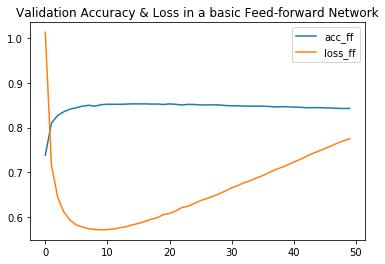

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

acc_ff = result_ff.history['val_acc']
loss_ff = result_ff.history['val_loss']
plt.plot(acc_ff)
plt.plot(loss_ff)

plt.legend(['acc_ff', 'loss_ff'])
plt.title("Validation Accuracy & Loss in a basic Feed-forward Network")
plt.show()

Basically, in this model, the accuracy starts to keep unchanged after 10 epochs while the loss gets worse after about 8 epochs. 

### 4. Estimate a recurrent neural network (RNN) with a layer_simple_rnn

In [15]:
from keras.layers import SimpleRNN
# Use a task-specific embedding layer with an appropriate number of output dimensions (select this yourself)
rnn = Sequential()
rnn.add(Embedding(10000, 30, input_length=100))
rnn.add(SimpleRNN(30))
rnn.add(Dense(24, activation='softmax'))
rnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_rnn = rnn.fit(train_x, train_y, validation_data=(val_x,val_y), epochs=30, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/30
278612/278612 [==============================] - 25s 91us/step - loss: 2.2450 - acc: 0.3369 - val_loss: 1.6427 - val_acc: 0.5338
Epoch 2/30
278612/278612 [==============================] - 27s 97us/step - loss: 1.3463 - acc: 0.6397 - val_loss: 1.2821 - val_acc: 0.6467
Epoch 3/30
278612/278612 [==============================] - 25s 89us/step - loss: 1.0411 - acc: 0.7313 - val_loss: 1.0364 - val_acc: 0.7294
Epoch 4/30
278612/278612 [==============================] - 26s 93us/step - loss: 0.9006 - acc: 0.7704 - val_loss: 0.9427 - val_acc: 0.7552
Epoch 5/30
278612/278612 [==============================] - 27s 95us/step - loss: 0.8199 - acc: 0.7912 - val_loss: 0.8473 - val_acc: 0.7854
Epoch 6/30
278612/278612 [==============================] - 27s 95us/step - loss: 0.7622 - acc: 0.8054 - val_loss: 0.8875 - val_acc: 0.7727
Epoch 7/30
278612/278612 [==============================] - 25s 89us/step - loss: 0.7148 - acc: 0.8175 - val_

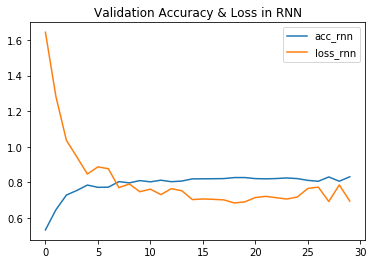

In [20]:
acc_rnn = result_rnn.history['val_acc']
loss_rnn = result_rnn.history['val_loss']
plt.plot(acc_rnn)
plt.plot(loss_rnn)

plt.legend(['acc_rnn', 'loss_rnn'])
plt.title("Validation Accuracy & Loss in RNN")
plt.show()

Similarly, the accuracy starts to keep unchanged after 10 epochs while the loss gets worse after about 8 epochs. We will use 15 epochs for the following analysis. 

### 5. Estimate an RNN with an LSTM layer

In [35]:
from keras.layers import LSTM

lstm = Sequential()
lstm.add(Embedding(10000, 30, input_length=100))
lstm.add(LSTM(30))
lstm.add(Dense(24, activation='softmax'))
lstm.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_lstm = lstm.fit(train_x, train_y, validation_data=(val_x,val_y), epochs=30, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/30
278612/278612 [==============================] - 81s 292us/step - loss: 2.2725 - acc: 0.3156 - val_loss: 1.6858 - val_acc: 0.5200
Epoch 2/30
278612/278612 [==============================] - 78s 279us/step - loss: 1.2504 - acc: 0.6638 - val_loss: 1.2438 - val_acc: 0.6610
Epoch 3/30
278612/278612 [==============================] - 78s 281us/step - loss: 0.8445 - acc: 0.7861 - val_loss: 0.7722 - val_acc: 0.8038
Epoch 4/30
278612/278612 [==============================] - 78s 279us/step - loss: 0.6964 - acc: 0.8203 - val_loss: 0.7732 - val_acc: 0.7974
Epoch 5/30
278612/278612 [==============================] - 81s 291us/step - loss: 0.6252 - acc: 0.8364 - val_loss: 0.6787 - val_acc: 0.8216
Epoch 6/30
278612/278612 [==============================] - 77s 277us/step - loss: 0.5815 - acc: 0.8450 - val_loss: 0.6974 - val_acc: 0.8114
Epoch 7/30
278612/278612 [==============================] - 77s 277us/step - loss: 0.5504 - acc: 0.8523

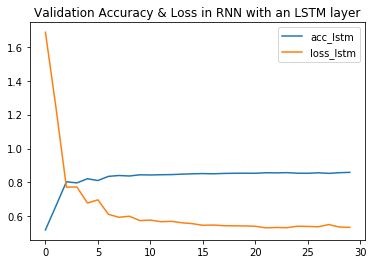

In [37]:
acc_lstm = result_lstm.history['val_acc']
loss_lstm = result_lstm.history['val_loss']
plt.plot(acc_lstm)
plt.plot(loss_lstm)

plt.legend(['acc_lstm', 'loss_lstm'])
plt.title("Validation Accuracy & Loss in RNN with an LSTM layer")
plt.show()

The accuracy starts to keep unchanged after 5 epochs.

### 6. Estimate an RNN with a GRU layer

In [38]:
from keras.layers import GRU

gru = Sequential()
gru.add(Embedding(10000, 30, input_length=100))
gru.add(GRU(30))
gru.add(Dense(24, activation='softmax'))
gru.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_gru = gru.fit(train_x, train_y, validation_data=(val_x,val_y), epochs=30, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/30
278612/278612 [==============================] - 68s 243us/step - loss: 2.2900 - acc: 0.3202 - val_loss: 1.7487 - val_acc: 0.5124
Epoch 2/30
278612/278612 [==============================] - 67s 242us/step - loss: 1.4265 - acc: 0.6235 - val_loss: 1.1891 - val_acc: 0.7008
Epoch 3/30
278612/278612 [==============================] - 70s 252us/step - loss: 1.0162 - acc: 0.7455 - val_loss: 0.9119 - val_acc: 0.7740
Epoch 4/30
278612/278612 [==============================] - 64s 231us/step - loss: 0.8047 - acc: 0.7981 - val_loss: 0.7757 - val_acc: 0.8056
Epoch 5/30
278612/278612 [==============================] - 64s 230us/step - loss: 0.6930 - acc: 0.8220 - val_loss: 0.7057 - val_acc: 0.8186
Epoch 6/30
278612/278612 [==============================] - 64s 231us/step - loss: 0.6251 - acc: 0.8355 - val_loss: 0.6497 - val_acc: 0.8290
Epoch 7/30
278612/278612 [==============================] - 64s 231us/step - loss: 0.5768 - acc: 0.8455

### 7. Estimate five additional neural network models with different configurations of hyperparameters (e.g. number of layers, number of hidden units, dropout, weight regularization, pre-trained word embeddings)

In [40]:
# rnn model for two layers
rnn2 = Sequential()
rnn2.add(Embedding(10000, 30, input_length=100))
rnn2.add(SimpleRNN(30, return_sequences=True))
rnn2.add(SimpleRNN(30))
rnn2.add(Dense(24, activation='softmax'))
rnn2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_rnn2 = rnn2.fit(train_x, train_y, validation_data=(val_x,val_y), epochs=30, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/30
278612/278612 [==============================] - 49s 174us/step - loss: 1.8940 - acc: 0.4597 - val_loss: 1.3536 - val_acc: 0.6272
Epoch 2/30
278612/278612 [==============================] - 49s 176us/step - loss: 1.1075 - acc: 0.7117 - val_loss: 1.5171 - val_acc: 0.5943
Epoch 3/30
278612/278612 [==============================] - 46s 164us/step - loss: 0.9390 - acc: 0.7573 - val_loss: 0.9358 - val_acc: 0.7602
Epoch 4/30
278612/278612 [==============================] - 48s 174us/step - loss: 0.8407 - acc: 0.7824 - val_loss: 0.9062 - val_acc: 0.7658
Epoch 5/30
278612/278612 [==============================] - 47s 168us/step - loss: 0.7767 - acc: 0.7991 - val_loss: 0.9572 - val_acc: 0.7474
Epoch 6/30
278612/278612 [==============================] - 50s 178us/step - loss: 0.7283 - acc: 0.8116 - val_loss: 0.9138 - val_acc: 0.7562
Epoch 7/30
278612/278612 [==============================] - 48s 173us/step - loss: 0.6863 - acc: 0.8230

In [41]:
#rnn drop model for dropout rate = 0.2 
rnn_drop = Sequential()
rnn_drop.add(Embedding(10000, 20, input_length=100))
rnn_drop.add(SimpleRNN(20, dropout=0.2))
rnn_drop.add(Dense(24, activation='softmax'))
rnn_drop.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_rnn_drop = rnn_drop.fit(train_x, train_y, validation_data=(val_x,val_y), epochs=30, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/30
278612/278612 [==============================] - 24s 87us/step - loss: 2.4166 - acc: 0.2884 - val_loss: 1.9022 - val_acc: 0.4519
Epoch 2/30
278612/278612 [==============================] - 20s 73us/step - loss: 1.7196 - acc: 0.5056 - val_loss: 1.5585 - val_acc: 0.5694
Epoch 3/30
278612/278612 [==============================] - 19s 69us/step - loss: 1.4253 - acc: 0.6084 - val_loss: 1.2926 - val_acc: 0.6525
Epoch 4/30
278612/278612 [==============================] - 20s 70us/step - loss: 1.2715 - acc: 0.6543 - val_loss: 1.2054 - val_acc: 0.6783
Epoch 5/30
278612/278612 [==============================] - 19s 69us/step - loss: 1.1864 - acc: 0.6800 - val_loss: 1.1350 - val_acc: 0.7019
Epoch 6/30
278612/278612 [==============================] - 18s 66us/step - loss: 1.1301 - acc: 0.6972 - val_loss: 1.1310 - val_acc: 0.7021
Epoch 7/30
278612/278612 [==============================] - 18s 66us/step - loss: 1.0845 - acc: 0.7111 - val_

In [27]:
#rnn drop model for dropout rate = 0.8
rnn_drop2 = Sequential()
rnn_drop2.add(Embedding(10000, 20, input_length=100))
rnn_drop2.add(SimpleRNN(20, dropout=0.8))
rnn_drop2.add(Dense(24, activation='softmax'))
rnn_drop2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_rnn_drop2 = rnn_drop2.fit(train_x, train_y, validation_data=(val_x,val_y), epochs=30, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/30
278612/278612 [==============================] - 22s 78us/step - loss: 2.7181 - acc: 0.1672 - val_loss: 2.3884 - val_acc: 0.2464
Epoch 2/30
278612/278612 [==============================] - 21s 77us/step - loss: 2.3779 - acc: 0.2636 - val_loss: 2.1629 - val_acc: 0.3354
Epoch 3/30
278612/278612 [==============================] - 23s 83us/step - loss: 2.2574 - acc: 0.3078 - val_loss: 2.0065 - val_acc: 0.3891
Epoch 4/30
278612/278612 [==============================] - 22s 80us/step - loss: 2.1561 - acc: 0.3362 - val_loss: 1.8764 - val_acc: 0.4333
Epoch 5/30
278612/278612 [==============================] - 21s 75us/step - loss: 2.0733 - acc: 0.3605 - val_loss: 1.8519 - val_acc: 0.4255
Epoch 6/30
278612/278612 [==============================] - 22s 77us/step - loss: 2.0204 - acc: 0.3784 - val_loss: 1.7176 - val_acc: 0.4968
Epoch 7/30
278612/278612 [==============================] - 20s 73us/step - loss: 1.9797 - acc: 0.3935 - val_

In [29]:
#gru model for batch size = 300
gru1 = Sequential()
gru1.add(Embedding(10000, 30, input_length=100))
gru1.add(GRU(30))
gru1.add(Dense(24, activation='softmax'))
gru1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_gru1 = gru1.fit(train_x, train_y, validation_data=(val_x,val_y), epochs=30, batch_size=300)

Train on 278612 samples, validate on 69649 samples
Epoch 1/30
278612/278612 [==============================] - 90s 322us/step - loss: 2.0909 - acc: 0.3857 - val_loss: 1.3875 - val_acc: 0.6331
Epoch 2/30
278612/278612 [==============================] - 87s 311us/step - loss: 1.0884 - acc: 0.7266 - val_loss: 0.9508 - val_acc: 0.7585
Epoch 3/30
278612/278612 [==============================] - 87s 312us/step - loss: 0.7942 - acc: 0.7985 - val_loss: 0.7515 - val_acc: 0.8071
Epoch 4/30
278612/278612 [==============================] - 86s 308us/step - loss: 0.6687 - acc: 0.8245 - val_loss: 0.6671 - val_acc: 0.8247
Epoch 5/30
278612/278612 [==============================] - 91s 325us/step - loss: 0.6022 - acc: 0.8383 - val_loss: 0.6258 - val_acc: 0.8313
Epoch 6/30
278612/278612 [==============================] - 92s 329us/step - loss: 0.5596 - acc: 0.8469 - val_loss: 0.5935 - val_acc: 0.8384
Epoch 7/30
278612/278612 [==============================] - 90s 322us/step - loss: 0.5290 - acc: 0.8538

In [30]:
# lstm model for 10 embedding layer 
lstm2 = Sequential()
lstm2.add(Embedding(10000, 10, input_length=100))
lstm2.add(LSTM(10))
lstm2.add(Dense(24, activation='softmax'))
lstm2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_lstm2 = lstm2.fit(train_x, train_y, validation_data=(val_x,val_y), epochs=30, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/30
278612/278612 [==============================] - 53s 191us/step - loss: 2.6276 - acc: 0.1883 - val_loss: 2.3735 - val_acc: 0.2487
Epoch 2/30
278612/278612 [==============================] - 56s 201us/step - loss: 2.1965 - acc: 0.3052 - val_loss: 2.0201 - val_acc: 0.3779
Epoch 3/30
278612/278612 [==============================] - 54s 193us/step - loss: 1.7678 - acc: 0.4751 - val_loss: 1.5701 - val_acc: 0.5530
Epoch 4/30
278612/278612 [==============================] - 52s 188us/step - loss: 1.3904 - acc: 0.6190 - val_loss: 1.2629 - val_acc: 0.6697
Epoch 5/30
278612/278612 [==============================] - 51s 184us/step - loss: 1.1218 - acc: 0.7161 - val_loss: 1.1164 - val_acc: 0.7112
Epoch 6/30
278612/278612 [==============================] - 50s 180us/step - loss: 0.9615 - acc: 0.7636 - val_loss: 0.9403 - val_acc: 0.7724
Epoch 7/30
278612/278612 [==============================] - 48s 172us/step - loss: 0.8620 - acc: 0.7915

### 8. For each model, plot the validation loss and accuracy over each epoch.

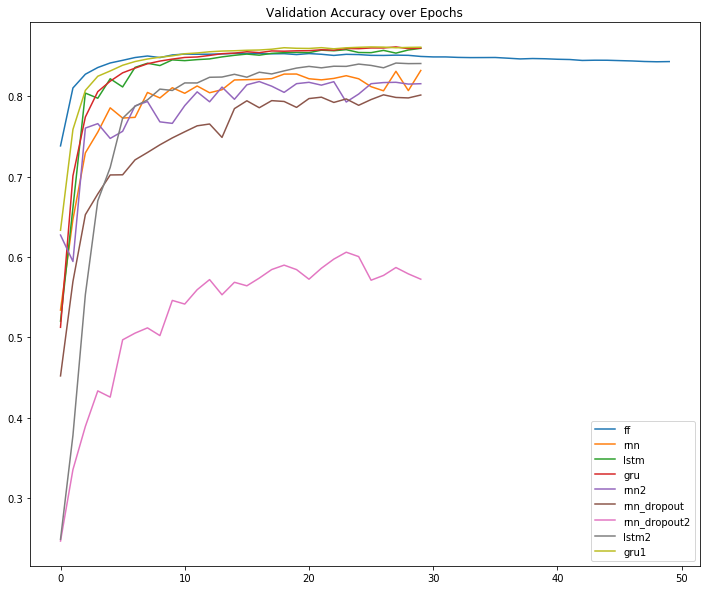

In [42]:
acc_ff = result_ff.history['val_acc']
acc_rnn = result_rnn.history['val_acc']
acc_lstm = result_lstm.history['val_acc']
acc_gru = result_gru.history['val_acc']

acc_rnn2 = result_rnn2.history['val_acc']
acc_rnn_drop = result_rnn_drop.history['val_acc']
acc_rnn_drop2 = result_rnn_drop2.history['val_acc']
acc_lstm2 = result_lstm2.history['val_acc']
acc_gru1 = result_gru1.history['val_acc']

plt.figure(figsize=(12, 10))
plt.plot(acc_ff)
plt.plot(acc_rnn)
plt.plot(acc_lstm)
plt.plot(acc_gru)

plt.plot(acc_rnn2)
plt.plot(acc_rnn_drop)
plt.plot(acc_rnn_drop2)
plt.plot(acc_lstm2)
plt.plot(acc_gru1)
plt.legend(['ff', 'rnn', 'lstm', 'gru', 'rnn2', 'rnn_dropout', 'rnn_dropout2', 'lstm2', 'gru1'])
plt.title('Validation Accuracy over Epochs')
plt.show()

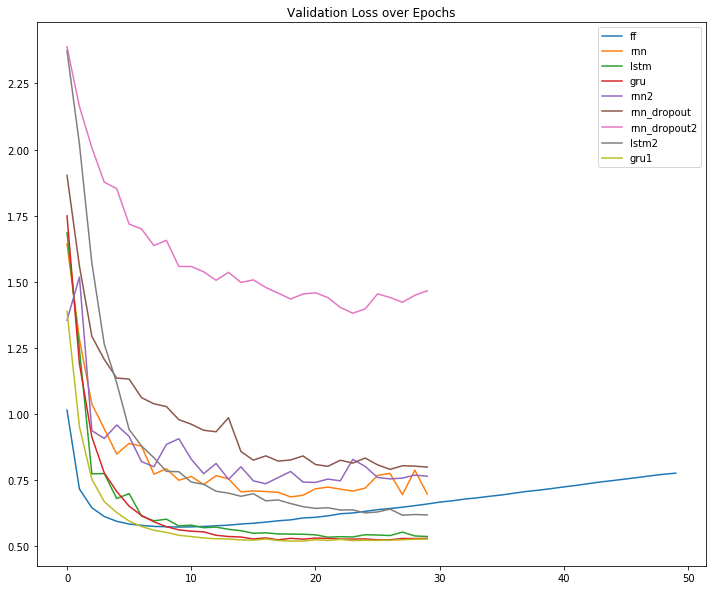

In [43]:
loss_ff = result_ff.history['val_loss']
loss_rnn = result_rnn.history['val_loss']
loss_lstm = result_lstm.history['val_loss']
loss_gru = result_gru.history['val_loss']

loss_rnn2 = result_rnn2.history['val_loss']
loss_rnn_drop = result_rnn_drop.history['val_loss']
loss_rnn_drop2 = result_rnn_drop2.history['val_loss']
loss_lstm2 = result_lstm2.history['val_loss']
loss_gru1 = result_gru1.history['val_loss']

plt.figure(figsize=(12, 10))
plt.plot(loss_ff)
plt.plot(loss_rnn)
plt.plot(loss_lstm)
plt.plot(loss_gru)

plt.plot(loss_rnn2)
plt.plot(loss_rnn_drop)
plt.plot(loss_rnn_drop2)
plt.plot(loss_lstm2)
plt.plot(loss_gru1)
plt.legend(['ff', 'rnn', 'lstm', 'gru', 'rnn2', 'rnn_dropout', 'rnn_dropout2', 'lstm2', 'gru1'])
plt.title('Validation Loss over Epochs')
plt.show()

### 9. Select the best performing model based on the validation set and evaluate its performance using the test set. Assume that with hand-coding we can achieve a 95% accuracy rate. Would your neural network perform better or worse than hand-coding?

In [45]:
gru1.evaluate(test_x, test_y)

38693/38693 [==============================] - 14s 360us/step


[0.5390027863383247, 0.859328560723118]

In [46]:
lstm.evaluate(test_x, test_y)

38693/38693 [==============================] - 17s 431us/step


[0.5434251307857332, 0.8580621817915283]

In [47]:
gru.evaluate(test_x, test_y)

38693/38693 [==============================] - 14s 356us/step


[0.5397725826917306, 0.8608275398666323]

I think the best model is the RNN with an GRU layer, but these three models above perform similar. The test set loss and accuracy is 0.53977 and 0.86083 respectively. However, it is worse than hand-coding but I couldn't know whether there exists minimum loss and better performance after very extreme large epochs.